# Lab 3. Genetic Algorithms
# Task 3.2 The 8-Queens Problem
## Problem Descriptions
Design a genetic algorithm and implement a program to suggest the position of 8 queens on an 8x8 chessboard so that no queens attack each other. Each queen is not allowed to be placed on the same row, column and diagonal. Firstly, the genetic algorithm is designed by specifying the encoding scheme, fitness function, and genetic operators.

1. Encoding scheme: Symbolic encoding is selected as the encoding scheme, where the numbers are the permutation of 0-7. Symbolic encoding enforces both the column constraint and the row constraint because it is a permutation. Therefore, the genetic algorithm only needs to enforce the diagonal constraints.

2. Fitness function: The fitness function is evaluated by the number of queens attacking each other, and a low number of queens attacking each other results in a lower value. Therefore, a lower value indicates better individual fitness performance. If the value is 0, means that no queen is attacking each other, optimal solution has been generated.

3. Genetic operators:
 *   Selection: Selection is done by tournament selection. In this task,
     each tournament consists of 3 individuals, and the winner of each tournament is selected to be part of the next generation.
     
 *   Crossover: A pair of parents is selected and single-point crossover
     is employed. A random crossover point is selected, and parts beyond the selected point are exchanged between parents.

 *   Mutation: It is accomplished by randomly changing the position of
     queens.



## Implementation and Results

In [ ]:
!pip install deap
import random
import numpy as np
from deap import algorithms, base, creator, tools


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 583.5 kB/s eta 0:00:00


In [ ]:

NB_QUEENS = 8
def evalNQueens(individual):

    # create 2 list for the falling diagonal (fd) and the raising diagonal (rd)
    fd = np.zeros(2*NB_QUEENS-1)
    rd = np.zeros(2*NB_QUEENS-1)

    # count the number of queens placed on diagonals fd/rd
    for i in range(NB_QUEENS):
      fd[i+individual[i]] += 1
      rd[NB_QUEENS-1-i+individual[i]] += 1

    # sum the number of queens if more than 1 queen on a diagonal
    return np.sum(fd[fd>1]) + np.sum(rd[rd>1]),


In [ ]:
# enforce only 1 queen per column by using a list of NB_QUEENS
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# enforce only 1 queen per row by using permutation
toolbox = base.Toolbox()
toolbox.register("permutation", random.sample, range(NB_QUEENS), NB_QUEENS)

# register all elements of the GA
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalNQueens)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=2.0/NB_QUEENS)
toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
# run the GA to get the result
random.seed(64)
pop = toolbox.population(n=300)
algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, verbose=False)
best = tools.selBest(pop, 1)[0]
print("Best: %s. Fitness value: %s" %(best, best.fitness.values[0]))

Best: [5, 3, 1, 7, 4, 6, 0, 2]. Fitness value: 0.0


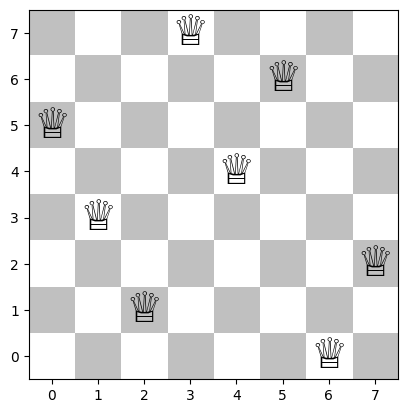

In [ ]:
# display the result
import matplotlib.pyplot as plt

chessboard = np.ones((NB_QUEENS, NB_QUEENS))
chessboard[1::2,0::2] = 0.75
chessboard[0::2,1::2] = 0.75
plt.imshow(chessboard, cmap='gray', origin='lower', vmin=0, vmax=1)
for x in range(NB_QUEENS):
    plt.text(x, best[x], '♕', fontsize=30, ha='center', va='center')

## Discussions


Using a genetic algorithm to solve 8 queens problem, it provides an optimal solution of [5, 3, 1, 7, 4, 6, 0, 2] with a fitness value of 0 on a 8x8 chess board. Each number in the array corresponds to the row position of a queen in the respective column and the 0 fitness value indicates no queen is attacking each other using this position arrangement.

![picture](https://github.com/mengheng02/image-file/blob/main/12x12%20chessboard.png?raw=true)

Using a genetic algorithm to solve 12 queens problem, it provides an optimal solution of  [4, 7, 9, 6, 2, 0, 11, 8, 10, 1, 3, 5] with a fitness value of 0 on a 12x12 chess board. It is impossible to place 12 queens on an 8x8 chessboard while not attacking each other. Each queen would require its row, and since there are only 8 rows, it's not possible to place 12 queens without violating the constraints of the problem.


